# Machine Learning Assignment: Linear Regression on the Boston Housing Dataset


#### Objective:
The aim of this assignment is to apply your understanding of linear regression to the Boston Housing dataset. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. This hands-on assignment will guide you through the process of data loading, cleaning, exploration, and applying linear regression models.


#### Part 1: Data Preparation

Load the Boston Housing dataset. You can load it using `sklearn.datasets.load_boston()` or any other method you prefer.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_17376\3461471877.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [3]:
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['MEDV'] = target

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# df = pd.read_csv('/content/HousingData.csv')
# df

1. **Loading the Dataset**

Check for any missing or null values in the dataset. Handle missing values if there are any. Provide a brief explanation of your approach.

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df['CRIM']=df['CRIM'].fillna(df['CRIM'].mode()[0])
df['ZN']=df['ZN'].fillna(df['ZN'].mode()[0])
df['INDUS']=df['INDUS'].fillna(df['INDUS'].mode()[0])
df['CHAS']=df['CHAS'].fillna(df['CHAS'].mode()[0])
df['AGE']=df['AGE'].fillna(df['AGE'].mode()[0])
df['LSTAT']=df['LSTAT'].fillna(df['LSTAT'].mode()[0])
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

2. **Data Cleaning**

Perform a basic statistical analysis of the dataset's features (mean, median, mode, etc.). Visualize the distribution of at least 3 variables using histograms or box plots. Use a scatter plot to visualize the relationship between the 'average number of rooms per dwelling' and the median value of homes.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of CRIM')

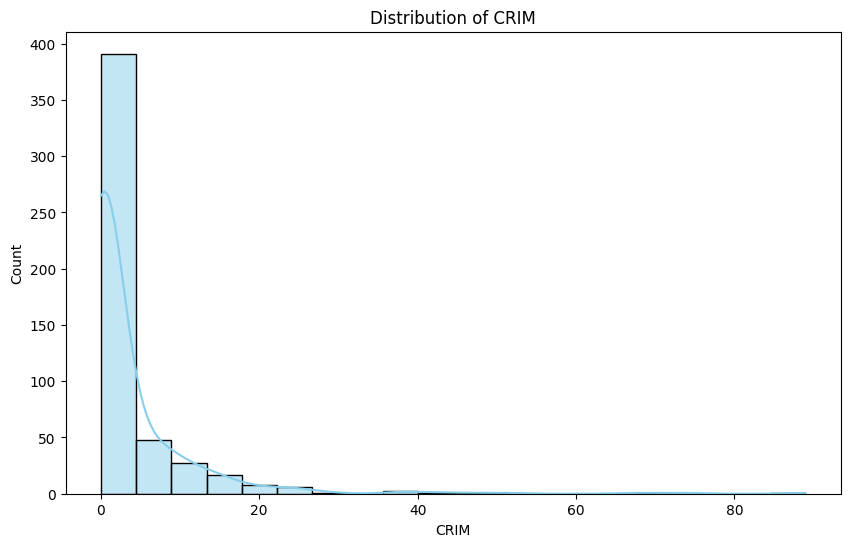

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['CRIM'],bins=20,kde=True, color='skyblue')
plt.title('Distribution of CRIM')

Text(0.5, 1.0, 'Distribution of TAX')

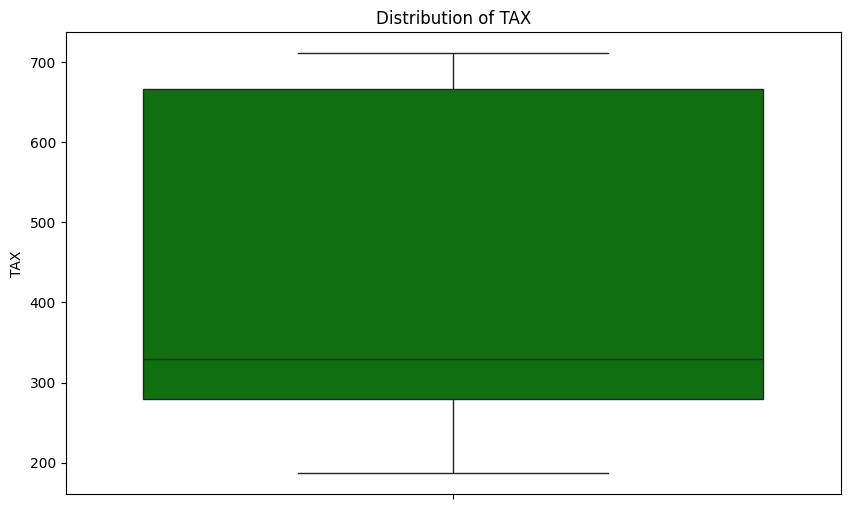

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(y='TAX',data=df, color='green')
plt.title('Distribution of TAX')

Text(0.5, 1.0, 'Distribution of LSTAT')

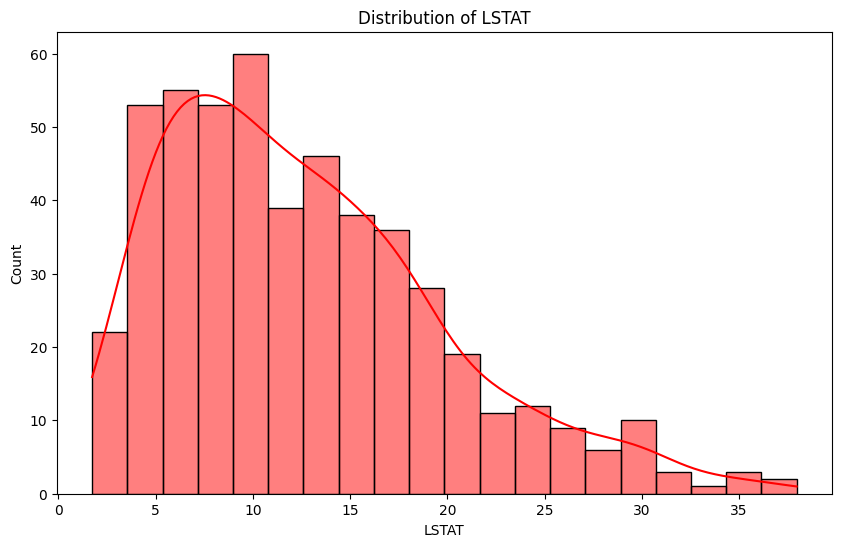

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['LSTAT'],bins=20,kde=True, color='red')
plt.title('Distribution of LSTAT')

Text(0.5, 0, 'Average Number of Rooms per Dwelling')

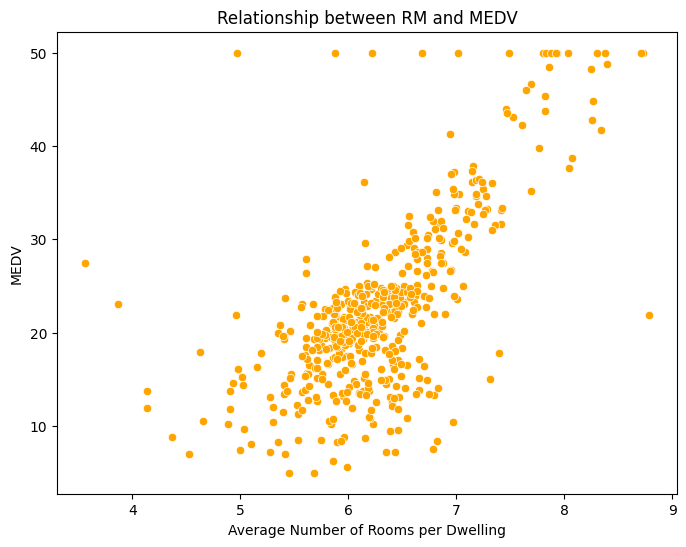

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MEDV', data=df, color='orange')
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average Number of Rooms per Dwelling')


#### Part 2: Linear Regression Analysis

Choose a single predictor variable and the median value of homes as the response variable. Split the dataset into training and testing sets using an appropriate split ratio. Implement a simple linear regression model to predict the median value of homes based on the predictor variable you have chosen. Evaluate the model's performance using appropriate metrics (e.g., R-squared, Mean Squared Error).

In [13]:
data = df[['RM','MEDV']]
data

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
x = df[['RM']]
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train

,RM
5,6.430
116,6.176
45,5.682
16,5.935
468,5.926
...,...
106,5.836
270,5.856
348,6.635
435,6.629


In [15]:
x_test

,RM
173,6.416
274,6.758
491,5.983
72,6.065
452,6.297
...,...
441,6.406
23,5.813
225,8.725
433,6.436


In [16]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

In [17]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [18]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
pred = model.predict(x_test)

In [20]:
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print("R-squared:",r2)
print("Mean Squared Error:",mse)

R-squared: 0.4584649934303068
Mean Squared Error: 40.35144969787305


1. **Simple Linear Regression**

Now, choose multiple predictor variables that you hypothesize might influence the median value of homes. Implement a multiple linear regression model using the selected predictor variables. Evaluate and compare the performance of your multiple linear regression model to the simple linear regression model.

In [21]:
x_multi = df[['CRIM','RM','LSTAT']]
y_multi = df['MEDV']

In [22]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y_multi, test_size = 0.3, random_state =42)


In [23]:
model_multi = LinearRegression()
model_multi.fit(x_train_multi, y_train_multi)

LinearRegression()

In [24]:
pred_multi = model_multi.predict(x_test_multi)

In [25]:
r2_multi = r2_score(y_test_multi, pred_multi)
mse_multi = mean_squared_error(y_test_multi, pred_multi)

In [26]:
print("Multiple Linear Regression Model:")
print("R-squared:", r2_multi)
print("Mean Squared Error:", mse_multi)
print("\nComparison with Simple Linear Regression Model:")
print("R-squared (Simple Linear Regression):", r2)
print("Mean Squared Error (Simple Linear Regression):", mse)

Multiple Linear Regression Model:
R-squared: 0.5977087771978933
Mean Squared Error: 29.975964330767464

Comparison with Simple Linear Regression Model:
R-squared (Simple Linear Regression): 0.4584649934303068
Mean Squared Error (Simple Linear Regression): 40.35144969787305


#### Part 3: Model Interpretation and Evaluation

Interpret the coefficients of your linear regression model. What does each coefficient represent in the context of the problem?

In [27]:
coefficients = model_multi.coef_
intercept = model_multi.intercept_

In [28]:
print("Intercept :",intercept)
print("Cofficients :")
for feature, coef in zip(x_multi.columns, coefficients):
  print(feature, ':', coef,",",end=" ")

Intercept : -1.2405510324250315
Cofficients :
CRIM : -0.1236201160537502 , RM : 5.0966177270056034 , LSTAT : -0.6081745895048544 , 

1. **Model Interpretation**

Discuss the model performance. How well does your model predict the median value of homes? Reflect on the limitations of your linear regression model and how it might be improved.

In [29]:
print("Model Performance and Limitations:")
print("1. Simple Linear Regression Model:")
print("- The simple linear regression model using only 'RM' as a predictor performs reasonably well with an R-squared of", r2)
print("- However, it may have limitations in capturing the complexity of relationships.")

print("\n2. Multiple Linear Regression Model:")
print("- The multiple linear regression model including 'CRIM','RM' and 'LSTAT' as predictors shows improved performance with a higher R-squared of", r2_multi)
print("- It considers more factors influencing median home value, but it still might have limitations.")

print("\n3. Limitations of Linear Regression:")
print("- Linear regression assumes a linear relationship between predictors and the response, which may not always hold true.")

print("\n4. Potential Improvements:")
print("- Explore non-linear models such as polynomial regression or tree-based models to capture non-linear relationships.")
print("- Consider feature engineering to create new informative features or transform existing ones.")

Model Performance and Limitations:
1. Simple Linear Regression Model:
- The simple linear regression model using only 'RM' as a predictor performs reasonably well with an R-squared of 0.4584649934303068
- However, it may have limitations in capturing the complexity of relationships.

2. Multiple Linear Regression Model:
- The multiple linear regression model including 'CRIM','RM' and 'LSTAT' as predictors shows improved performance with a higher R-squared of 0.5977087771978933
- It considers more factors influencing median home value, but it still might have limitations.

3. Limitations of Linear Regression:
- Linear regression assumes a linear relationship between predictors and the response, which may not always hold true.

4. Potential Improvements:
- Explore non-linear models such as polynomial regression or tree-based models to capture non-linear relationships.
- Consider feature engineering to create new informative features or transform existing ones.


BIBHAKAR PAUL